In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip 
import statsmodels.api as sm

In [2]:
df11=pd.read_csv('predictive data with interest rate.csv')
df11.head()

,Date,GDP,FDI,FII Debt,FII Equity,Exports,Imports,Interst rate ind
0,9/30/2022,38165.78,1686.0,509.72,-903.08,35445.42,61158.43,6.15
1,6/30/2022,36851.25,4773.0,-181.02,-6436.60,40133.73,66311.89,5.15
2,3/31/2022,40780.25,4307.0,-740.96,-5384.94,42224.01,60738.85,4.25
3,12/31/2021,38218.78,2249.0,-1561.77,-2524.78,37806.99,59484.94,4.25
4,9/30/2021,35891.78,4276.0,1741.96,1792.22,33814.61,56286.42,4.25


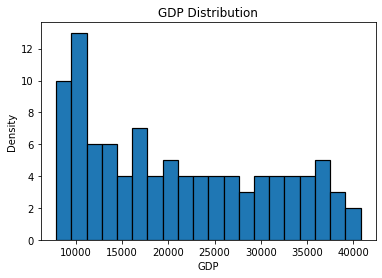

In [3]:
plt.figure(1)
plt.hist(df11['GDP'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('GDP')
plt.ylabel('Density')
plt.title('GDP Distribution')
plt.show()

In [ ]:
### Converting data into log

In [4]:
df_log11 = df11[['GDP','FDI','Exports','Imports']].applymap(lambda x: np.log(x+1))

In [5]:
df_log11.tail()

,GDP,FDI,Exports,Imports
96,8.972175,5.707110,7.922232,8.211268
97,9.046701,5.730100,7.760855,8.002982
98,9.107838,5.749393,8.130354,8.241967
99,9.107471,5.739793,8.100768,8.256088
100,NaN,NaN,NaN,NaN


In [6]:
df_normal=df11['Interst rate ind']

In [7]:
df_normal.head()

0    6.15
1    5.15
2    4.25
3    4.25
4    4.25
Name: Interst rate ind, dtype: float64

In [ ]:
#### combing and filtiring the data 

In [8]:
df_log22=pd.concat([df_log11,df_normal],axis=1)

In [9]:
df_log22.head()

,GDP,FDI,Exports,Imports,Interst rate ind
0,10.549721,7.430707,10.475778,11.021239,6.15
1,10.514672,8.470940,10.599997,11.102140,5.15
2,10.615978,8.368229,10.650768,11.014355,4.25
3,10.551108,7.718685,10.540276,10.993495,4.25
4,10.488291,8.361007,10.428678,10.938226,4.25


In [ ]:
### cleaning the data

In [10]:
df_log22['Interst rate ind'].isna().sum()

1

In [11]:
df_log22=df_log22.ffill()

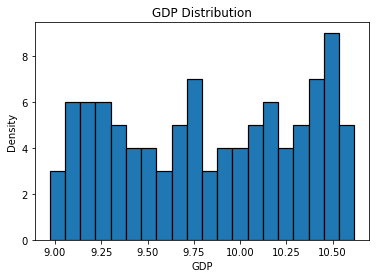

In [12]:
plt.figure(1)
plt.hist(df_log22['GDP'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('GDP')
plt.ylabel('Density')
plt.title('GDP Distribution')
plt.show()

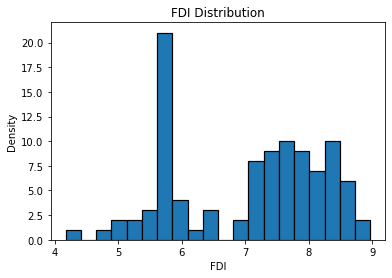

In [13]:
plt.figure(1)
plt.hist(df_log22['FDI'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('FDI')
plt.ylabel('Density')
plt.title('FDI Distribution')
plt.show()

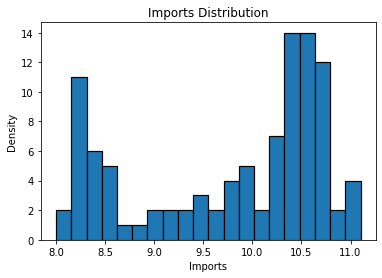

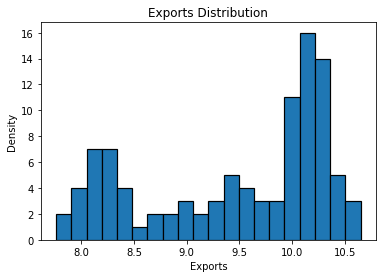

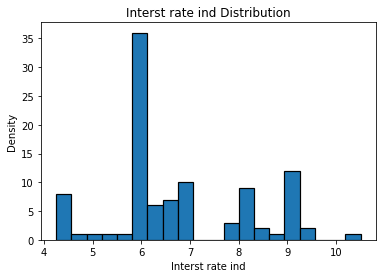

In [14]:

plt.figure(1)
plt.hist(df_log22['Imports'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Imports')
plt.ylabel('Density')
plt.title('Imports Distribution')
plt.show()


plt.figure(1)
plt.hist(df_log22['Exports'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Exports')
plt.ylabel('Density')
plt.title('Exports Distribution')
plt.show()

plt.figure(1)
plt.hist(df_log22['Interst rate ind'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Interst rate ind')
plt.ylabel('Density')
plt.title('Interst rate ind Distribution')
plt.show()

---------------------------------Scatter Plots:Log Wage against Other variables ----------------


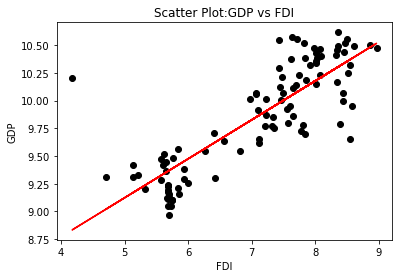

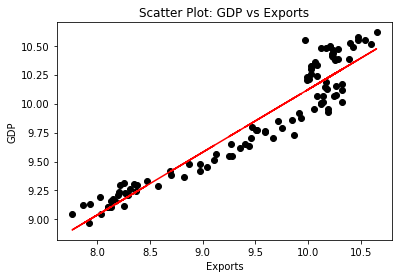

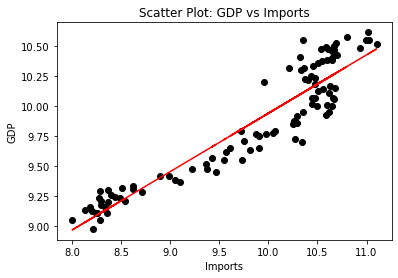

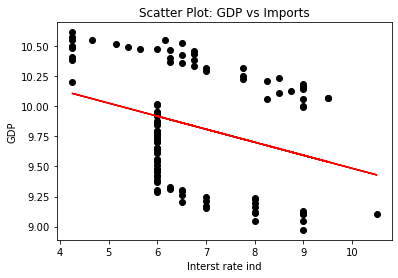

---------------------------------End of Scatter Plots ---------------------------


In [15]:
print ("---------------------------------Scatter Plots:Log Wage against Other variables ----------------")

plt.figure(2)
plt.scatter(df_log22['FDI'], df_log22['GDP'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(df_log22['FDI'], df_log22['GDP'], 1)  # m = slope, b=intercept
plt.plot(df_log22['FDI'], m*df_log22['FDI'] + b, color='red')

# end of option


plt.xlabel('FDI')
plt.ylabel('GDP')
plt.title('Scatter Plot:GDP vs FDI')
plt.show()





# optional: adding fitted line 
m, b


plt.figure(4)
plt.scatter(df_log22['Exports'], df_log22['GDP'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(df_log22['Exports'], df_log22['GDP'], 1)  # m = slope, b=intercept
plt.plot(df_log22['Exports'], m*df_log22['Exports'] + b, color='red')

# end of option


plt.xlabel('Exports')
plt.ylabel('GDP')
plt.title('Scatter Plot: GDP vs Exports')
plt.show()


plt.figure(5)
plt.scatter(df_log22['Imports'], df_log22['GDP'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(df_log22['Imports'], df_log22['GDP'], 1)  # m = slope, b=intercept
plt.plot(df_log22['Imports'], m*df_log22['Imports'] + b, color='red')

# end of option


plt.xlabel('Imports')
plt.ylabel('GDP')
plt.title('Scatter Plot: GDP vs Imports')
plt.show()

plt.figure(5)
plt.scatter(df_log22['Interst rate ind'], df_log22['GDP'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(df_log22['Interst rate ind'], df_log22['GDP'], 1)  # m = slope, b=intercept
plt.plot(df_log22['Interst rate ind'], m*df_log22['Interst rate ind'] + b, color='red')

# end of option


plt.xlabel('Interst rate ind')
plt.ylabel('GDP')
plt.title('Scatter Plot: GDP vs Imports')
plt.show()

print ("---------------------------------End of Scatter Plots ---------------------------")


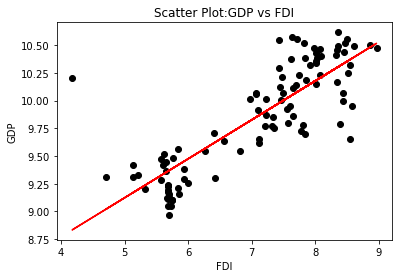

In [16]:
plt.figure(2)
plt.scatter(df_log22[''], df_log22['GDP'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(df_log22['FDI'], df_log22['GDP'], 1)  # m = slope, b=intercept
plt.plot(df_log22['FDI'], m*df_log22['FDI'] + b, color='red')

# end of option


plt.xlabel('FDI')
plt.ylabel('GDP')
plt.title('Scatter Plot:GDP vs FDI')
plt.show()


In [53]:
# Next is running a linear regression using OLS estimator

# The linear regression is used only on two varaibles for now. We will extend the analysis later
# The point here is to learn how to run regression and interpret Python output
# The equation: wage=b_0+b_1*educ+b_2*hours+u


formula='GDP ~   FDI+ Q("Interst rate ind") '  # linear equation, the first variable is dependent and the rest are explanator
# Please pay atte)nting to the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results=smf.ols(formula, df_log22).fit()  # the OLS library, we called the output 'results'


print('******************* Linear Regression Output **********************************')

print(results.summary())

print('*******************************************************************************')



******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.84e-28
Time:                        17:34:58   Log-Likelihood:                -5.8131
No. Observations:                 101   AIC:                             17.63
Df Residuals:                      98   BIC:                             25.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

---------------------------------Plot of Residuals ---------------------------
Use the plot to visually inspect the presence of autocorrelation


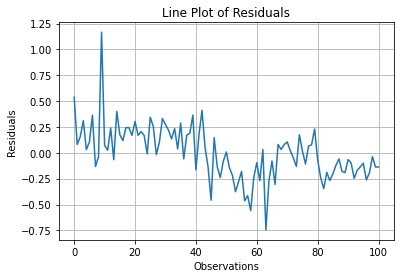

The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation
---------------------------------End of Plot of Residuals ---------------------------


In [54]:
# Let's now learn about the properties of the residuals
# Begin with plotting residuals 
# The plot of residuals against observations will help to detect the presence of autocorrelation in the data

print ("---------------------------------Plot of Residuals ---------------------------")
print ("Use the plot to visually inspect the presence of autocorrelation")
plt.figure(1)
plt.plot(results.resid) 
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Line Plot of Residuals')
plt.grid(True) # I have added this for me to be able to accurately see the graph
plt.show()

print("The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation")
print ("---------------------------------End of Plot of Residuals ---------------------------")


In [20]:
#Inspecting heteroskedacitiy formally using the white test

mean_resid=results.resid.mean()
print(mean_resid)



print ("---------------------------------White Test------------------------------------------")

# White test for heteroskedasticity
name=['LM Stat', 'pvalue', 'f-value', 'f pvalue' ]
white_test =sms.het_white(results.resid,results.model.exog)  # make sure you have the right library

print(lzip(name,white_test))

     
print ("--------------------------------- End of White Test------------------------------------------")

# If there is heteroskedasticity, then we need to correct it. The previous regression is incorrect
# because it is based on the wrong aussmption about the errors and therefore the t statistics are
# incorrect.

# White Robust Standard Errors


2.2688122008181417e-15
---------------------------------White Test------------------------------------------
[('LM Stat', 40.896184172427276), ('pvalue', 5.22431007307252e-06), ('f-value', 6.879860396453885), ('f pvalue', 1.6931180549222528e-07)]
--------------------------------- End of White Test------------------------------------------


In [50]:
# Restimate the model using White Robust Standard Errors

formula='GDP ~   FDI + Q("Interst rate ind")'  # linear equation, the first variable is dependent and the rest are explanatory
# Please the wording used to describe variables: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results1=smf.ols(formula, df_log22).fit(cov_type='HC1')  # the OLS library, we called the output 'results'

print('******************* Linear Regression Output **********************************')

print(results1.summary())

print('*******************************************************************************')


******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.14e-28
Time:                        17:33:39   Log-Likelihood:                -5.8131
No. Observations:                 101   AIC:                             17.63
Df Residuals:                      98   BIC:                             25.47
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [22]:
# Testing for autocorrelation using Breusch-Godfrey test
   
print ("---------------------------------BG Test------------------------------------------")

# Breusch Godfrey Test
name=['LM Stat', 'pvalue', 'f-value', 'f pvalue' ]
bg_test =sms.acorr_breusch_godfrey(results, nlags=1, store=False)  # make sure you have the right library

print(lzip(name,bg_test))

     
print ("--------------------------------- End of BG Test------------------------------------------")



---------------------------------BG Test------------------------------------------
[('LM Stat', 72.87807699123718), ('pvalue', 1.3791162207098926e-17), ('f-value', 248.78438750361124), ('f pvalue', 2.116296873466396e-28)]
--------------------------------- End of BG Test------------------------------------------


In [52]:
formula='GDP ~  FDI + Q("Interst rate ind") '  # linear equation, the first variable is dependent and the rest are explanatory
# Please the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results2=smf.ols(formula, df_log22).fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True})  # the OLS library, we called the output 'results'

print('******************* Linear Regression Output **********************************')

print(results2.summary())

print('*******************************************************************************')



******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     99.65
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.42e-24
Time:                        17:34:21   Log-Likelihood:                -5.8131
No. Observations:                 101   AIC:                             17.63
Df Residuals:                      98   BIC:                             25.47
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## checking correlation 

<AxesSubplot:>

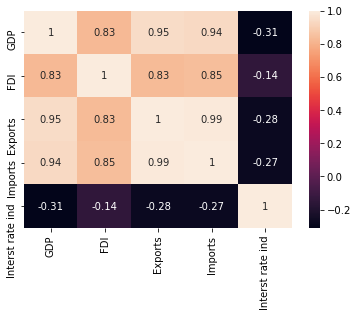

In [25]:
sns.heatmap(df_log22.corr(),annot=True)